# Libs

In [495]:
import pandas as pd
import numpy as np

In [496]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

In [497]:
from mpl_toolkits.basemap import Basemap

In [498]:
from tqdm import tqdm
tqdm.pandas()

In [499]:
import cpi

In [500]:
LEFT_LOWER_BOUND = (-0.5, 51.3)
RIGHT_UPPER_BOUND = (0.18, 51.7)
CENTER = (51.5, 0.12)

CENTER_1 = (-0.17, 51.57)
CENTER_2 = (-0.17, 51.49)
CENTER_3 = (-0.26, 51.46)
CENTER_4 = (-0.13, 51.6)

In [501]:
from math import radians, cos, sin, asin, sqrt


def geodistance(lng1, lng2, lat1, lat2):
    lng1, lat1, lng2, lat2 = map(radians, [float(lng1), float(lat1), float(lng2), float(lat2)])
    dlon = lng2 - lng1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2 
    distance = 2 * asin (sqrt(a)) * 6371 * 1000
    distance = round(distance / 1000, 3)
    return distance

# Data uploading

In [502]:
data = pd.read_csv('data/train.csv')
data.head()

,ID,fullAddress,postcode,country,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,sale_month,sale_year,price
0,0,"38 Adelina Grove, London, E1 3AD",E1 3AD,England,E1,51.519406,-0.053261,NaN,3.0,80.0,1.0,Freehold,Semi-Detached House,C,1,1995,77000
1,1,"6 Cleveland Grove, London, E1 4XL",E1 4XL,England,E1,51.521261,-0.053384,2.0,4.0,110.0,1.0,Leasehold,Terrace Property,D,1,1995,89995
2,2,"65 Sanderstead Road, London, E10 7PW",E10 7PW,England,E10,51.569054,-0.034892,1.0,3.0,84.0,1.0,Freehold,Terrace Property,D,1,1995,59000
3,3,"5 Queenswood Gardens, London, E11 3SE",E11 3SE,England,E11,51.564212,0.026292,NaN,2.0,72.0,1.0,Leasehold,Purpose Built Flat,NaN,1,1995,51500
4,4,"12 Woodlands Road, London, E11 4RW",E11 4RW,England,E11,51.563430,0.006260,1.0,3.0,104.0,1.0,Freehold,Mid Terrace House,D,1,1995,63500


In [503]:
df = data.copy()

# Data Analysis

## Nans processing

## Graphics

In [ ]:
# Q1 = df['price'].quantile(0.25)
# Q3 = df['price'].quantile(0.75)
# IQR = 1.5 * (Q3 - Q1)
# upper_bound_1 = Q3 + IQR

In [472]:
# Q1 = df['floorAreaSqM'].quantile(0.25)
# Q3 = df['floorAreaSqM'].quantile(0.75)
# IQR = 3 * (Q3 - Q1)
# upper_bound_2 = Q3 + IQR

In [473]:
# Q1 = df['bedrooms'].quantile(0.25)
# Q3 = df['bedrooms'].quantile(0.75)
# IQR = 3 * (Q3 - Q1)
# upper_bound_3 = Q3 + IQR

In [474]:
# Q1 = df['bathrooms'].quantile(0.25)
# Q3 = df['bathrooms'].quantile(0.75)
# IQR = 3 * (Q3 - Q1)
# upper_bound_4 = Q3 + IQR

In [475]:
# Q1 = df['livingRooms'].quantile(0.25)
# Q3 = df['livingRooms'].quantile(0.75)
# IQR = 3 * (Q3 - Q1)
# upper_bound_5 = Q3 + IQR

In [ ]:

# df = df[df['price'] < upper_bound_1]
# df = df[df['floorAreaSqM'] < upper_bound_2]
# df = df[df['bedrooms'] < upper_bound_3]
# df = df[df['bathrooms'] < upper_bound_4]
# df = df[df['livingRooms'] < upper_bound_5]

<Axes: xlabel='price'>

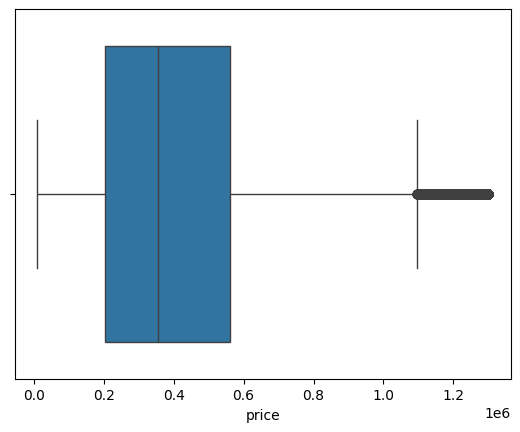

In [478]:
sns.boxplot(data=df, x='price')

## Geography

100%|██████████| 156873/156873 [05:53<00:00, 443.87it/s]


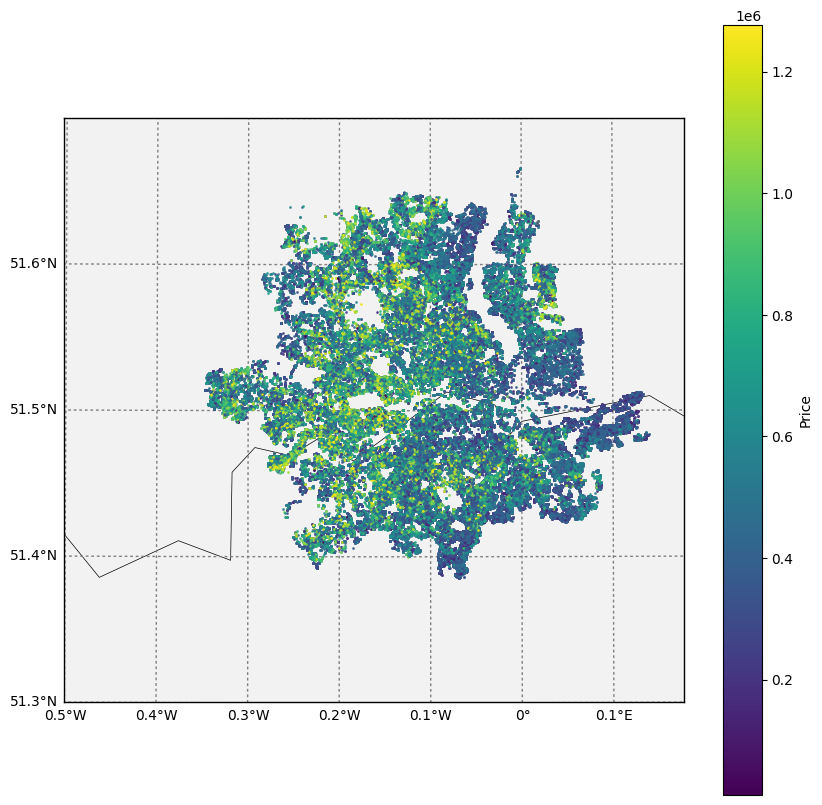

In [77]:
fig, ax = plt.subplots(figsize=(10, 10))
m = Basemap(llcrnrlon=LEFT_LOWER_BOUND[0], llcrnrlat=LEFT_LOWER_BOUND[1],
            urcrnrlon=RIGHT_UPPER_BOUND[0], urcrnrlat=RIGHT_UPPER_BOUND[1],
            resolution='i',
            projection='tmerc',
            lon_0=np.mean([LEFT_LOWER_BOUND[0], RIGHT_UPPER_BOUND[0]]), 
            lat_0=np.mean([LEFT_LOWER_BOUND[1], RIGHT_UPPER_BOUND[1]]))

m.drawmapboundary(fill_color='#46bcec')
m.fillcontinents(color='#f2f2f2', lake_color='#46bcec')
m.drawcoastlines()
m.drawrivers()
m.drawcountries()

parallels = np.arange(LEFT_LOWER_BOUND[1], RIGHT_UPPER_BOUND[1], 0.1)
meridians = np.arange(LEFT_LOWER_BOUND[0], RIGHT_UPPER_BOUND[0], 0.1)

m.drawparallels(parallels, labels=[1, 0, 0, 0], color="gray", dashes=[2, 2], fontsize=10)
m.drawmeridians(meridians, labels=[0, 0, 0, 1], color="gray", dashes=[2, 2], fontsize=10)


tmp = df.copy()
norm = Normalize(vmin=tmp['price'].min(), vmax=tmp['price'].max())
colormap = plt.cm.viridis

n = len(tmp)

for lon, lat, price in tqdm(zip(tmp['longitude'].iloc[::(len(tmp) // n)], tmp['latitude'].iloc[::(len(tmp) // n)], tmp['price'].iloc[::(len(tmp) // n)]), total=n):
    x, y = m(lon, lat)
    color = colormap(norm(price))
    m.plot(x, y, marker='o', color=color, markersize=1, alpha=0.8)

sm = plt.cm.ScalarMappable(cmap=colormap, norm=norm)
sm.set_array([])
plt.colorbar(sm, ax=ax, label='Price')

plt.show()

# Preprocessing

In [504]:
def preprocess(df, is_train=True):
    df = df.drop(columns=[
        'fullAddress',
        'postcode',
        'country',
        'outcode',
    ])

    for i in ['propertyType', 'currentEnergyRating', 'tenure']:
        df[i] = df[i].fillna(df[i].mode()[0])
    num_columns = df.select_dtypes('number').columns
    df[num_columns] = df[num_columns].fillna(df[num_columns].median())


    df['distance'] = df.progress_apply(lambda x: geodistance(x['longitude'], CENTER[0],
                                                                        x['latitude'], CENTER[1]), axis=1)
    df['distance_1'] = df.progress_apply(lambda x: geodistance(x['longitude'], CENTER_1[0],
                                                                        x['latitude'], CENTER_1[1]), axis=1)
    df['distance_2'] = df.progress_apply(lambda x: geodistance(x['longitude'], CENTER_2[0],
                                                                        x['latitude'], CENTER_2[1]), axis=1)
    df['distance_3'] = df.progress_apply(lambda x: geodistance(x['longitude'], CENTER_3[0],
                                                                        x['latitude'], CENTER_3[1]), axis=1)
    df['distance_4'] = df.progress_apply(lambda x: geodistance(x['longitude'], CENTER_4[0],
                                                                        x['latitude'], CENTER_4[1]), axis=1)
    df['distance_5'] = df.progress_apply(lambda x: min(x['distance_1'], x['distance_2'], x['distance_3'], x['distance_4']), axis=1)

    df['sin_month'] = np.sin(2 * np.pi * df['sale_month'] / 12)

    return df

In [505]:
df = preprocess(df)

100%|██████████| 266325/266325 [00:02<00:00, 117669.73it/s]


In [506]:
df.corr(numeric_only=True)['price']

ID              0.216174
latitude        0.009192
longitude      -0.137680
bathrooms       0.257731
bedrooms        0.208854
floorAreaSqM    0.355963
livingRooms     0.182011
sale_month      0.004694
sale_year       0.225839
price           1.000000
distance        0.118322
distance_1     -0.135121
distance_2     -0.197041
distance_3     -0.154076
distance_4     -0.062669
distance_5     -0.173532
sin_month      -0.002077
Name: price, dtype: float64

# Fitting

In [507]:
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split

In [508]:
to_drop = ['ID', 'price', 'sale_month', 'latitude']
X = df.drop(to_drop, axis=1)
y = df['price']

In [509]:
cat_features = ['propertyType', 'currentEnergyRating', 'tenure']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

# model = CatBoostRegressor(iterations=1000,
#                           depth=3,
#                           learning_rate=0.01,
#                           eval_metric='RMSE',
#                           use_best_model=True,
#                           verbose=100)

model = CatBoostRegressor(iterations=1000,
                          use_best_model=True,
                          eval_metric='MAE',
                          verbose=100, 
                          cat_features=cat_features)

In [510]:
model.fit(X_train, y_train, eval_set=(X_test, y_test))

Learning rate set to 0.11816
0:	learn: 426242.6671628	test: 430989.8465242	best: 430989.8465242 (0)	total: 90ms	remaining: 1m 29s
100:	learn: 191650.3886319	test: 199672.6735372	best: 199672.6735372 (100)	total: 9.31s	remaining: 1m 22s
200:	learn: 183067.6099055	test: 192741.6849821	best: 192741.6849821 (200)	total: 18s	remaining: 1m 11s
300:	learn: 177221.7754113	test: 188578.2413903	best: 188578.2413903 (300)	total: 26.3s	remaining: 1m 1s
400:	learn: 173909.2317682	test: 186142.5743866	best: 186130.8479067 (396)	total: 35s	remaining: 52.4s
500:	learn: 171001.6990787	test: 184494.4382546	best: 184467.6623684 (494)	total: 44s	remaining: 43.8s
600:	learn: 168105.4068959	test: 183052.5843533	best: 183052.2010680 (596)	total: 53.3s	remaining: 35.4s
700:	learn: 166192.3598945	test: 182234.9440641	best: 182227.8166864 (699)	total: 1m 1s	remaining: 26.4s
800:	learn: 164080.4118841	test: 180987.8811574	best: 180985.9435633 (797)	total: 1m 10s	remaining: 17.5s
900:	learn: 162551.0424625	test: 

# Inference

In [520]:
pd.read_csv(r'data/sample_submission.csv').head()

,ID,price
0,266325,258621
1,266326,1827952
2,266327,381548
3,266328,117521
4,266329,934088


In [521]:
test = pd.read_csv(r'data/test.csv')

In [522]:
test = preprocess(test, is_train=False)

100%|██████████| 16547/16547 [00:00<00:00, 100181.22it/s]


In [523]:
test[X.columns].head()

,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,sale_year,distance,distance_1,distance_2,distance_3,distance_4,distance_5,sin_month
0,-0.071003,1.0,2.0,54.0,1.0,Leasehold,Flat/Maisonette,D,2024,7466.188,8.905,7.563,14.627,9.909,7.563,0.5
1,-0.068236,1.0,1.0,48.0,1.0,Leasehold,Purpose Built Flat,D,2024,7465.606,9.574,7.443,14.466,10.715,7.443,0.5
2,-0.066502,1.0,2.0,32.0,1.0,Leasehold,Flat/Maisonette,C,2024,7465.569,9.580,7.597,14.625,10.650,7.597,0.5
3,-0.057334,1.0,3.0,85.0,1.0,Leasehold,Purpose Built Flat,D,2024,7465.231,9.826,8.323,15.359,10.589,8.323,0.5
4,-0.051008,1.0,2.0,82.0,1.0,Leasehold,Flat/Maisonette,C,2024,7464.797,10.245,8.697,15.715,10.905,8.697,0.5


In [524]:
num_columns = test.select_dtypes('number').columns
test[num_columns] = test[num_columns].fillna(test[num_columns].median())

In [525]:
for i in cat_features:
    test[i] = test[i].fillna(test[i].mode()[0])

In [526]:
test.isna().sum()

ID                     0
latitude               0
longitude              0
bathrooms              0
bedrooms               0
floorAreaSqM           0
livingRooms            0
tenure                 0
propertyType           0
currentEnergyRating    0
sale_month             0
sale_year              0
distance               0
distance_1             0
distance_2             0
distance_3             0
distance_4             0
distance_5             0
sin_month              0
dtype: int64

In [527]:
test['price'] = model.predict(test[X.columns])

In [528]:
test[['ID', 'price']].to_csv('sub.csv', index=False)